# Análise da distribuição de valores de aluguel de imovéis no Brasil

<div>
<img src="https://i1.wp.com/blog.cesarrego.com.br/wp-content/uploads/2019/03/283467-saiba-agora-como-calcular-o-valor-do-aluguel-do-seu-imovel-735x400.jpg" width="600"/>
</div>

### Analisando um conjunto de dados imobiliários reais com informações de vários imóveis no Brasil.
### Visualização com gráficos Histograma e Densidade.

Importando bibliotecas necessárias e gerando dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# le dados e exibir o dataframe.
df = pd.read_csv('dadosoficina05.txt')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
2,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
3,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
4,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


In [4]:
# renomeando colunas para facilitar leitura do público/usuários.
df.columns = ['cidade', 'área' , 'quartos', 'banheiro', 'vagas_estacionamento', 'andares', 'animais', 'mobiliado', 'valor', 'aluguel', 'IPTU', 'seguro_contra_incêndio', 'valor total']
df.head()

,cidade,área,quartos,banheiro,vagas_estacionamento,andares,animais,mobiliado,valor,aluguel,IPTU,seguro_contra_incêndio,valor total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
2,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
3,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
4,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8204 entries, 0 to 8203
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cidade                  8204 non-null   object
 1   área                    8204 non-null   int64 
 2   quartos                 8204 non-null   int64 
 3   banheiro                8204 non-null   int64 
 4   vagas_estacionamento    8204 non-null   int64 
 5   andares                 8204 non-null   object
 6   animais                 8204 non-null   object
 7   mobiliado               8204 non-null   object
 8   valor                   8204 non-null   int64 
 9   aluguel                 8204 non-null   int64 
 10  IPTU                    8204 non-null   int64 
 11  seguro_contra_incêndio  8204 non-null   int64 
 12  valor total             8204 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 833.3+ KB


Visualizando a distribuição dos valores de aluguel

In [6]:
df['aluguel'].describe()

count     8204.000000
mean      2741.332277
std       2145.713594
min        450.000000
25%       1310.000000
50%       2100.000000
75%       3300.000000
max      24000.000000
Name: aluguel, dtype: float64

Visualizando dados outliers (ou não)

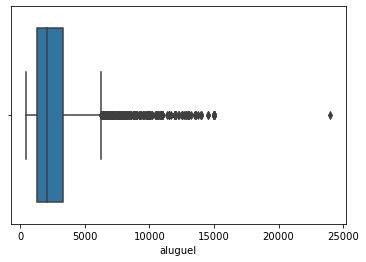

In [13]:
sns.boxplot(x='aluguel', data=df)
plt.show()

In [29]:
df[df['aluguel'] > 10000].sort_values(by='aluguel', ascending=False)

,cidade,área,quartos,banheiro,vagas_estacionamento,andares,animais,mobiliado,valor,aluguel,IPTU,seguro_contra_incêndio,valor total
1990,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
7916,São Paulo,192,4,5,4,11,not acept,furnished,2800,15000,90,191,18080
1596,São Paulo,98,1,2,0,27,acept,furnished,3177,15000,130,191,18500
1333,Rio de Janeiro,108,3,1,1,3,not acept,furnished,2300,15000,334,194,17830
1269,São Paulo,136,3,2,2,13,acept,furnished,1259,15000,374,191,16820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Porto Alegre,180,4,5,3,9,acept,furnished,2500,10500,410,154,13560
3418,São Paulo,174,3,4,3,15,not acept,not furnished,2500,10400,817,132,13850
451,São Paulo,178,3,4,4,6,acept,furnished,2700,10200,667,130,13700
5936,São Paulo,97,2,2,0,27,not acept,furnished,1100,10200,0,130,11430


Pelo gráfico boxplot e tabela percebe-se alguns aluguéis com valores acima de R$10mil que pode ser para imóveis tipo mansões ou edifícios em localidade ou tipo peculiar.

### Analisando dados de categórias especifícias
Se aceitam animais ou não.

In [55]:
pets = df.groupby('animais').count()
pets

,cidade,área,quartos,banheiro,vagas_estacionamento,andares,mobiliado,valor,aluguel,IPTU,seguro_contra_incêndio,valor total
animais,,,,,,,,,,,,
acept,6193,6193,6193,6193,6193,6193,6193,6193,6193,6193,6193,6193
not acept,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011


In [84]:
# Como plotar que aceita ou não animais??? ver documentação de string ou associar a contagem por diferença.

In [63]:
#plt.figure(figsize=(10,5))
#sns.barplot(x='animais', y='animais', data=pets, palette='Paired')
#plt.title('Quantidade de imovéis que aceitam animais')
#plt.show()

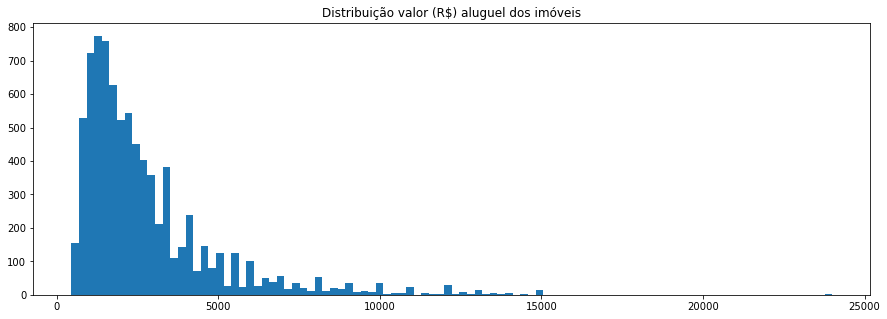

In [79]:
# Gerando gráfico para visualizar a distribuição dos valores de aluguel.
plt.figure(figsize=(15,5))
plt.title('Distribuição valor (R$) aluguel dos imóveis')
plt.hist(df['aluguel'], bins=100)
plt.show()

C:\Users\adema\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


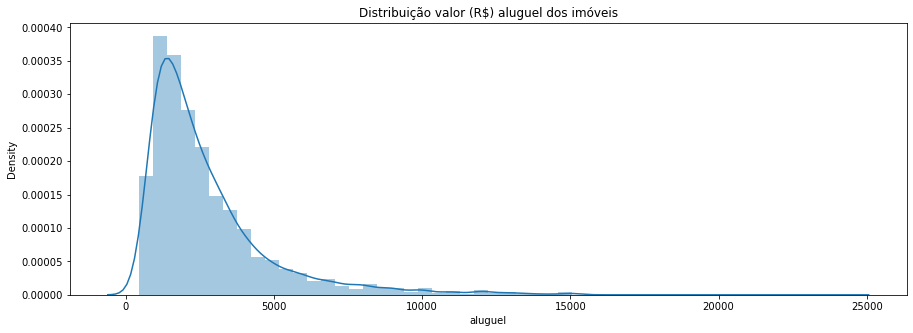

In [80]:
plt.figure(figsize=(15,5))
plt.title('Distribuição valor (R$) aluguel dos imóveis')
sns.distplot(df['aluguel'])
plt.show()

- Pelo gráfico e na descrição dos dados observa-se que os valores mais comuns estão em torno do valo de R$ 2.000mil.

- Observa-se pela descrição dos dados e pelo gráfico que há valores incomuns já acima de R$ 100mil em diante.
chegando até 305 mil. Podendo ser de grandes edifícos e mansões.

##### A visualização abaixo mostra o valor de aluguel por andares do imóvel.

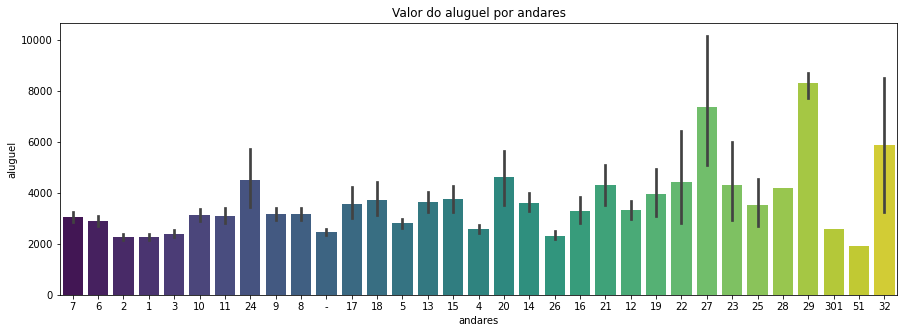

In [71]:
plt.figure(figsize=(15,5))
sns.barplot(x='andares', y='aluguel', data=df, palette='viridis')
plt.title('Valor do aluguel por andares')
plt.show()

##### Visualização do valor de aluguel por número de quartos

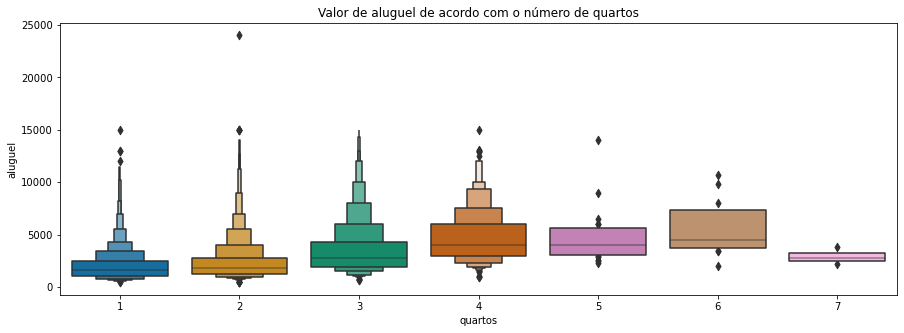

In [69]:
plt.figure(figsize=(15,5))
sns.boxenplot(x='quartos', y='aluguel', data=df, palette='colorblind')
plt.title('Valor de aluguel de acordo com o número de quartos')
plt.show()

#### Visualizando distribuição do valor do aluguel com a cidade

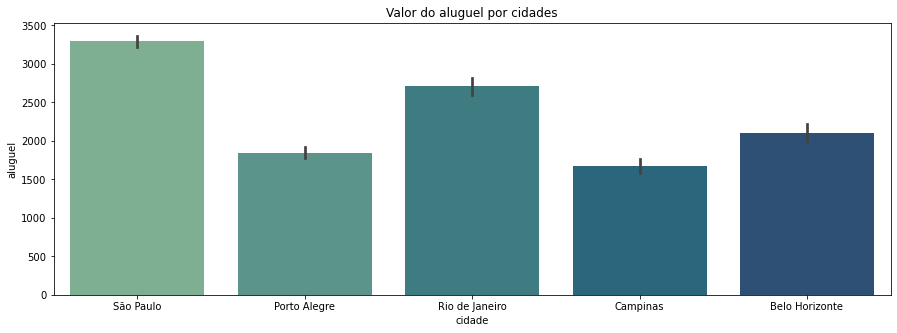

In [70]:
plt.figure(figsize=(15,5))
sns.barplot(x='cidade', y='aluguel', data=df, palette='crest')
plt.title('Valor do aluguel por cidades')
plt.show()

#### Analisando a relação do valor de aluguel com o valor de seguro contra incêndio

In [39]:
df['seguro_contra_incêndio'].describe()

count    8204.000000
mean       36.510605
std        28.121018
min         3.000000
25%        18.000000
50%        28.000000
75%        45.000000
max       305.000000
Name: seguro_contra_incêndio, dtype: float64

C:\Users\adema\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


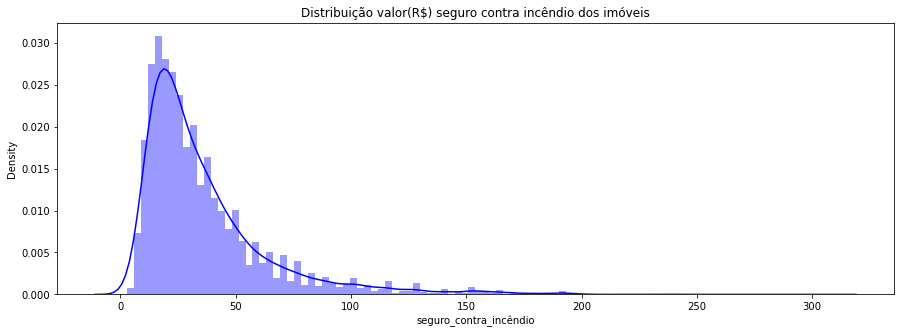

In [48]:
# Gerando gráfico densidade para visualizar a distribuição valores de seguros contra incêndios.
plt.figure(figsize=(15,5))
plt.title('Distribuição valor(R$) seguro contra incêndio dos imóveis')
sns.distplot(df['seguro_contra_incêndio'], color = 'b', bins=100)
plt.show()

<Figure size 2520x6480 with 0 Axes>

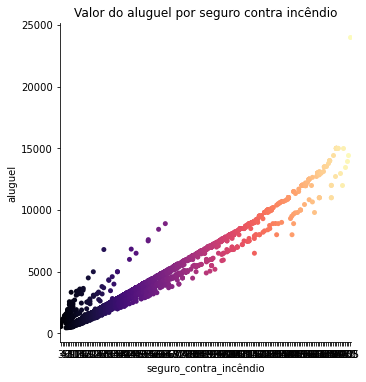

In [78]:
plt.figure(figsize=(35,90))
sns.catplot(x='seguro_contra_incêndio', y='aluguel', data=df, palette='magma')
plt.title('Valor do aluguel por seguro contra incêndio')
plt.show()

In [81]:
df_seg = df[['valor', 'aluguel', 'IPTU', 'seguro_contra_incêndio']]

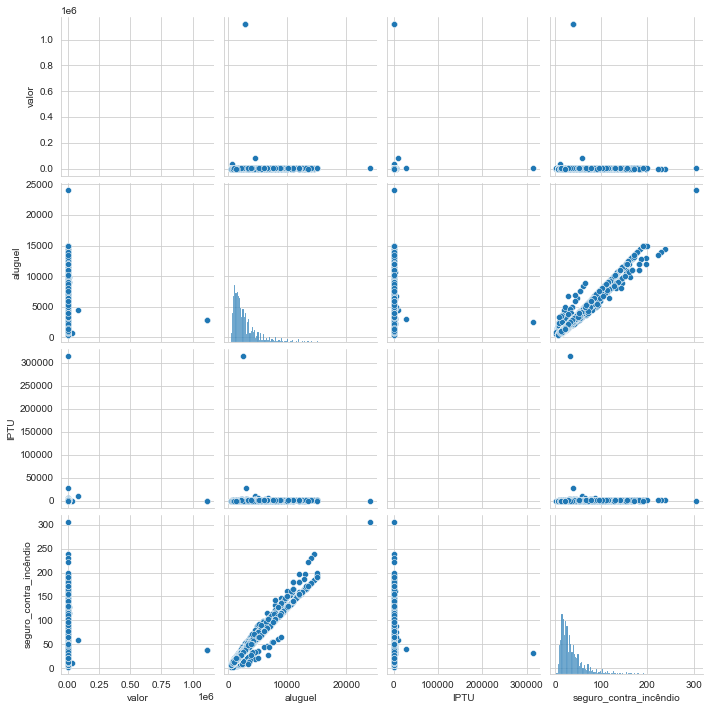

In [82]:
sns.set_palette='ch:'
sns.set_style('whitegrid')
sns.pairplot(df_seg)
plt.show()

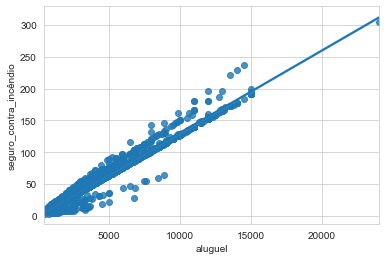

In [83]:
sns.regplot(x='aluguel', y='seguro_contra_incêndio', data=df)
plt.show()

- Avaliando correlação dos dados do dataset.
    Vê-se relação entre aluguel e o valor do seguro contra incêndio